<a href="https://colab.research.google.com/github/sowmya-520/AI/blob/main/mtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

In [19]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
from IPython.display import display


In [20]:
import pandas as pd

fsa = pd.read_csv('FinancialSentimentAnalysis.csv')
print('====================fsa.head() ==============')
print(fsa.head())
print('====================fsa.info() ==============')
print(fsa.info())
print('====================fsa.describe() ==============')
print(fsa.describe())


====================fsa.head() ==============
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
====================fsa.info() ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None
====================fsa.describe() ==============
                                                 Sentence Sentiment
count                                                5842      5842
unique                              

QUESTION 2

In [21]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove punctuations, numbers
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

fsa['processed_sentence'] = fsa['Sentence'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


QUESTION 3

In [22]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

fsa['cleaned_sentence'] = fsa['processed_sentence'].apply(lemmatize)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


QUESTION 4

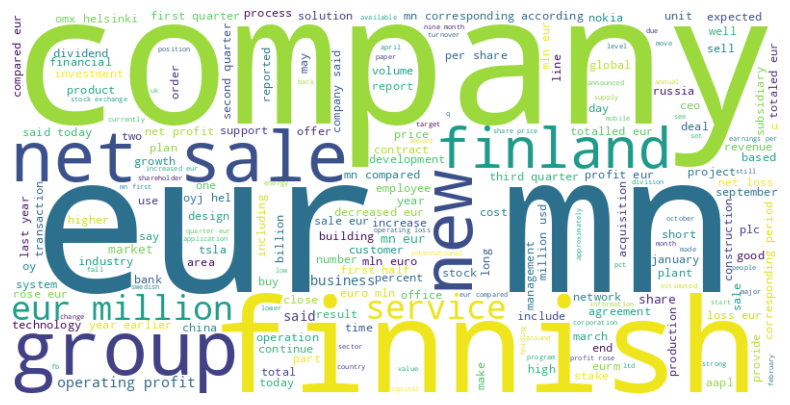

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(fsa['cleaned_sentence'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**QUESTION 5**

In [24]:
X = fsa['cleaned_sentence']
Y = fsa['Sentiment']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split Word2Vec vectors
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, Y, test_size=0.2, random_state=42)

# Train model using Word2Vec vectors
model_nb_w2v = GaussianNB()
model_nb_w2v.fit(X_train_w2v, y_train)

# Predict
train_pred_w2v = model_nb_w2v.predict(X_train_w2v)
test_pred_w2v = model_nb_w2v.predict(X_test_w2v)

# Accuracy
train_accuracy = accuracy_score(y_train, train_pred_w2v)
test_accuracy = accuracy_score(y_test, test_pred_w2v)

print(f"Train Accuracy (Word2Vec + GaussianNB): {train_accuracy:.4f}")
print(f"Test Accuracy (Word2Vec + GaussianNB): {test_accuracy:.4f}")


Train Accuracy (Word2Vec + GaussianNB): 0.4930
Test Accuracy (Word2Vec + GaussianNB): 0.4816


In [26]:
!pip install gensim


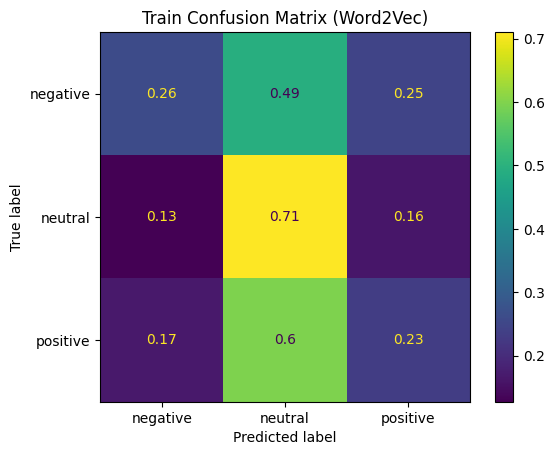

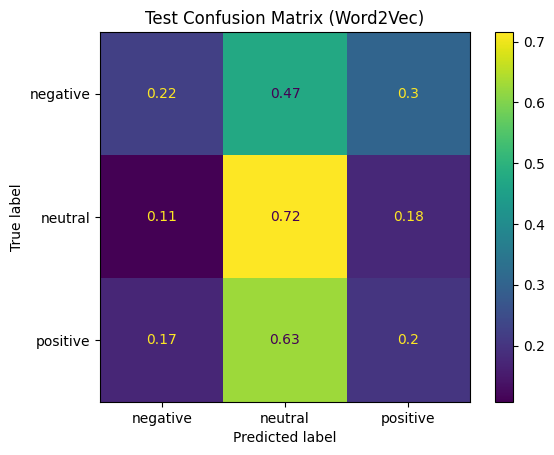

In [27]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Prepare tokens
tokens = [text.split() for text in X]

# Word2Vec
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

def get_vector(sentence):
    words = sentence.split()
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_w2v = np.vstack([get_vector(sent) for sent in X])

# Split
X_train, X_test, y_train, y_test = train_test_split(X_w2v, Y, test_size=0.2, random_state=42)

# Train
model_nb_w2v = GaussianNB()
model_nb_w2v.fit(X_train, y_train)

# Confusion Matrix
train_pred_w2v = model_nb_w2v.predict(X_train)
test_pred_w2v = model_nb_w2v.predict(X_test)
from sklearn.naive_bayes import GaussianNB
model_nb_w2v = GaussianNB()

ConfusionMatrixDisplay.from_predictions(y_train, train_pred_w2v, normalize='true')
plt.title("Train Confusion Matrix (Word2Vec)")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, test_pred_w2v, normalize='true')
plt.title("Test Confusion Matrix (Word2Vec)")
plt.show()


TF-IDF:

Simple, fast, sparse.

Good when context isn’t important.

Fails to capture semantics/synonyms.

Word2Vec:

Dense vectors.

Captures semantics and context better.

Slower and more memory intensive.

👉 Conclusion: Use TF-IDF for linear models and small/medium datasets. Use Word2Vec for tasks where context and semantics matter more.

**question 6**

In [28]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("The financial market is showing signs of recovery.")

displacy.render(doc, style="dep", jupyter=True)
